C:\Users\HP\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 34s 20ms/step - accuracy: 0.8109 - loss: 0.4437 - val_accuracy: 0.8477 - val_loss: 0.3568
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 29s 18ms/step - accuracy: 0.8625 - loss: 0.3359 - val_accuracy: 0.8521 - val_loss: 0.3582
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 28s 18ms/step - accuracy: 0.8788 - loss: 0.3035 - val_accuracy: 0.8734 - val_loss: 0.3065
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 29s 18ms/step - accuracy: 0.8891 - loss: 0.2770 - val_accuracy: 0.8814 - val_loss: 0.2909
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 35s 23ms/step - accuracy: 0.8980 - loss: 0.2533 - val_accuracy: 0.8842 - val_loss: 0.2966
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 35s 22ms/step - accuracy: 0.9068 - loss: 0.2342 - val_accuracy: 0.8873 - val_loss: 0.2985
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 35s 22ms/step - accuracy: 0.9157 - loss: 0.2099 - val_accuracy: 0.8938 - val_loss: 0.2764
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 33s 21ms/step - accuracy: 0.9225 -

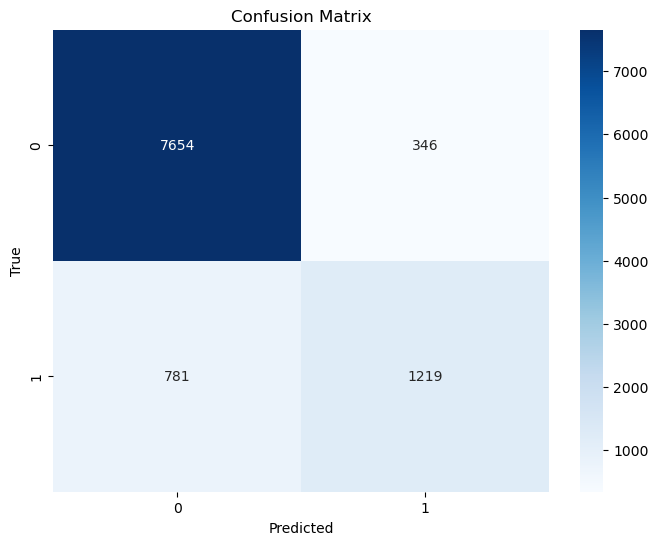

In [1]:
#Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score
import seaborn as sns

# Load and prepare the CIFAR-10 dataset
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Filter out the classes for the binary classification: can fly (1) and cannot fly (0)
# Can fly: airplane (0), bird (2)
# Cannot fly: other classes

# Create binary labels
train_labels_binary = np.isin(train_labels, [0, 2]).astype(int)
test_labels_binary = np.isin(test_labels, [0, 2]).astype(int)

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

# Define the CNN model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='sigmoid')  # Binary classification
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',  # Appropriate loss for binary classification
              metrics=['accuracy'])

# Train the model
history = model.fit(train_images, train_labels_binary, epochs=10, 
                    validation_data=(test_images, test_labels_binary))

# Evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels_binary, verbose=2)
print(f"Test accuracy: {test_acc}")

# Predictions
y_pred = (model.predict(test_images) > 0.5).astype("int32")

# Calculate evaluation metrics
precision = precision_score(test_labels_binary, y_pred)
recall = recall_score(test_labels_binary, y_pred)
f1 = f1_score(test_labels_binary, y_pred)
accuracy = accuracy_score(test_labels_binary, y_pred)

print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"Accuracy: {accuracy}")

# Confusion matrix
conf_matrix = confusion_matrix(test_labels_binary, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()
